# Notebook_14: Rewrite for Linear Model

Over the course of this project, the primary focus has changed from predictive accuracy to real world interpretability. It is clear from the initial model experimentation than Linear Models still have good accuracy on this data, and the additional interpretability they provide will be very useful for the linking to theory, a key component of the project.

In [1]:
import altair as alt
import altair_data_server
from altair_saver import save
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

sns.set(style='white', context='notebook')
%config InlineBackend.figure_format = 'retina'

alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
from src.config import FINAL_DATA, FIGURES
from src.models.model_metrics import score_model

In [4]:
al_df = pd.read_csv(FINAL_DATA/'al_data_final.csv')
abs_df = pd.read_csv(FINAL_DATA/'abs_data_final.csv')

In [5]:
al_df

,x,temp,nf_hz,amp_mm,tc_act
0,5,22,40.970000,12.010000,0.00
1,5,22,38.460000,12.290000,0.50
2,5,22,38.360000,10.470000,0.51
3,5,22,38.380000,9.880000,0.52
4,5,22,37.480877,12.786667,0.75
...,...,...,...,...,...
175,25,200,32.472500,17.736250,1.50
176,25,200,30.274583,18.053958,1.75
177,25,200,28.076667,18.371667,2.00
178,25,200,25.878750,18.689375,2.25


In [6]:
abs_df

,x,temp,nf_hz,amp_mm,tc_act
0,5,23,29.17,4.73,0.50
1,5,23,27.84,5.45,0.80
2,5,23,27.20,4.58,1.15
3,5,23,25.82,5.37,1.60
4,5,23,25.41,4.48,1.70
...,...,...,...,...,...
144,25,70,20.93,4.97,2.00
145,25,70,19.35,4.33,2.05
146,25,70,15.84,3.79,2.25
147,25,70,13.98,3.77,2.30


## Training Linear Models

Let's just start with the aluminium data for now

In [7]:
X = al_df.drop('tc_act', axis = 1)
y = al_df['tc_act']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [8]:
al_reg = LinearRegression()

al_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
score_model(al_reg, X_train, y_train)

Non-validation Scores
-----------
RMSE (No Val): 0.182
R^2 (No Val): 0.945

Validation Scores
-----------
RMSE's: [0.159 0.209 0.189 0.202 0.168]
Mean: 0.185
StDev: 0.019
CoV: 0.103


(0.1819474261623942,
 0.9452743345754637,
 array([0.15906417, 0.20892958, 0.18887268, 0.20167588, 0.1683564 ]),
 0.18537974179517436,
 0.019050789575102874,
 0.10276629684894073)

In [10]:
al_reg.coef_

array([ 0.01245819, -0.00379702, -0.12374536,  0.07931689])

In [11]:
feats = ['x', 'temp', 'nf_hz', 'amp_mm']
act_coefs = list(al_reg.coef_)

In [12]:
X = abs_df.drop('tc_act', axis = 1)
y = abs_df['tc_act']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

abs_nonscaled_reg = LinearRegression()

abs_nonscaled_reg.fit(X, y)

score_model(abs_nonscaled_reg, X_train, y_train)

Non-validation Scores
-----------
RMSE (No Val): 0.248
R^2 (No Val): 0.87

Validation Scores
-----------
RMSE's: [0.244 0.308 0.199 0.237 0.32 ]
Mean: 0.262
StDev: 0.046
CoV: 0.175


(0.24826100046541005,
 0.8702765508316026,
 array([0.24383813, 0.30808076, 0.19907637, 0.23673118, 0.3201745 ]),
 0.2615801856757646,
 0.045682769346241776,
 0.17464155103424675)

In [13]:
abs_nonscaled_reg.coef_

array([ 0.00595974, -0.00594067, -0.07838498, -0.18145164])

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
scaled_al_reg = RidgeCV()

scaled_al_reg.fit(X_train_scaled, y_train)

score_model(scaled_al_reg, X_train_scaled, y_train)

Non-validation Scores
-----------
RMSE (No Val): 0.248
R^2 (No Val): 0.871

Validation Scores
-----------
RMSE's: [0.241 0.309 0.208 0.232 0.319]
Mean: 0.262
StDev: 0.044
CoV: 0.168


(0.2475908981361965,
 0.8709759008537834,
 array([0.24104012, 0.30896426, 0.20777952, 0.23211654, 0.31890829]),
 0.26176174388665296,
 0.04408199120387279,
 0.16840501804939456)

In [16]:
scaled_al_reg.coef_

array([ 0.07991679, -0.07437967, -0.33658135, -0.2984013 ])

In [17]:
# Getting scaled coefs because it's a good proxy for feature_importance
scaled_coefs = list(scaled_al_reg.coef_)

In [18]:
scaled_coefs

[0.07991679499061041,
 -0.07437966878905107,
 -0.33658134579034715,
 -0.2984013024920239]

In [19]:
coef_dict = {feat: abs(coef) for (feat, coef) in zip(feats, scaled_coefs)}

In [20]:
coef_dict

{'x': 0.07991679499061041,
 'temp': 0.07437966878905107,
 'nf_hz': 0.33658134579034715,
 'amp_mm': 0.2984013024920239}

In [21]:
df_dict = {'features': ['Crack Position', 'Temperature', 'Natural Frequency', 'Amplitude'], 'coefficients': [abs(coef) for coef in scaled_coefs]}

In [22]:
df_dict

{'features': ['Crack Position',
  'Temperature',
  'Natural Frequency',
  'Amplitude'],
 'coefficients': [0.07991679499061041,
  0.07437966878905107,
  0.33658134579034715,
  0.2984013024920239]}

In [23]:
coef_df = pd.DataFrame(data = df_dict)

In [24]:
coef_df

,features,coefficients
0,Crack Position,0.079917
1,Temperature,0.074380
2,Natural Frequency,0.336581
3,Amplitude,0.298401


In [25]:
alt.Chart(coef_df).mark_bar().encode(
    x = alt.X('features:N', title = 'Features', sort = '-y', axis = alt.Axis(labelAngle=-45)),
    y = alt.Y('coefficients:Q', title = 'Absolute Magnitude of Coefficient')
).properties(
    width = 600,
    height = 400,
    title = "Ridge Regression Feature Importance (Aluminium)"
)

alt.Chart(...)

## Let's add the ABS data

In [26]:
X_abs = abs_df.drop('tc_act', axis = 1)
y_abs = abs_df['tc_act']

X_train_abs, X_test_abs, y_train_abs, y_test_abs = train_test_split(X_abs, y_abs, test_size = 0.2, shuffle = True)

abs_reg = RidgeCV()

abs_scaler = StandardScaler()

X_train_abs_scaled = abs_scaler.fit_transform(X_train_abs)
X_test_abs_scaled = abs_scaler.transform(X_test_abs)

abs_reg.fit(X_train_abs_scaled, y_train_abs)

score_model(abs_reg, X_train_abs_scaled, y_train_abs)

Non-validation Scores
-----------
RMSE (No Val): 0.252
R^2 (No Val): 0.861

Validation Scores
-----------
RMSE's: [0.238 0.29  0.277 0.265 0.245]
Mean: 0.263
StDev: 0.019
CoV: 0.074


(0.2520614146234483,
 0.8606441150691472,
 array([0.23814444, 0.29028909, 0.27722524, 0.26451449, 0.24525228]),
 0.2630851071162508,
 0.019401494489756557,
 0.0737460767065903)

In [27]:
abs_dict = {'features': ['Crack Position', 'Temperature', 'Natural Frequency', 'Amplitude'], 'coefficients': [abs(coef) for coef in list(abs_reg.coef_)]}

In [28]:
abs_df = pd.DataFrame(data = abs_dict)
abs_df

,features,coefficients
0,Crack Position,0.053956
1,Temperature,0.090427
2,Natural Frequency,0.403077
3,Amplitude,0.246021


In [29]:
coef_df

,features,coefficients
0,Crack Position,0.079917
1,Temperature,0.074380
2,Natural Frequency,0.336581
3,Amplitude,0.298401


In [30]:
coef_df['Material'] = ['Aluminium', 'Aluminium', 'Aluminium', 'Aluminium']
abs_df['Material'] = ['ABS', 'ABS', 'ABS', 'ABS']

In [31]:
coef_df

,features,coefficients,Material
0,Crack Position,0.079917,Aluminium
1,Temperature,0.074380,Aluminium
2,Natural Frequency,0.336581,Aluminium
3,Amplitude,0.298401,Aluminium


In [32]:
full_df = coef_df.append(abs_df, ignore_index = True)

In [33]:
full_df

,features,coefficients,Material
0,Crack Position,0.079917,Aluminium
1,Temperature,0.074380,Aluminium
2,Natural Frequency,0.336581,Aluminium
3,Amplitude,0.298401,Aluminium
4,Crack Position,0.053956,ABS
5,Temperature,0.090427,ABS
6,Natural Frequency,0.403077,ABS
7,Amplitude,0.246021,ABS


In [34]:
alt.Chart(full_df).mark_bar(opacity = 0.6).encode(
    x = alt.X('features:N', title = 'Features', sort = '-y', axis = alt.Axis(labelAngle=-45)),
    y = alt.Y('coefficients:Q', title = 'Relative Importance', stack = None),
    color = alt.Color('Material:N', title = 'Material')
).properties(
    width = 600,
    height = 400,
    title = "Relative Importance in Crack Depth Prediction"
)

alt.Chart(...)

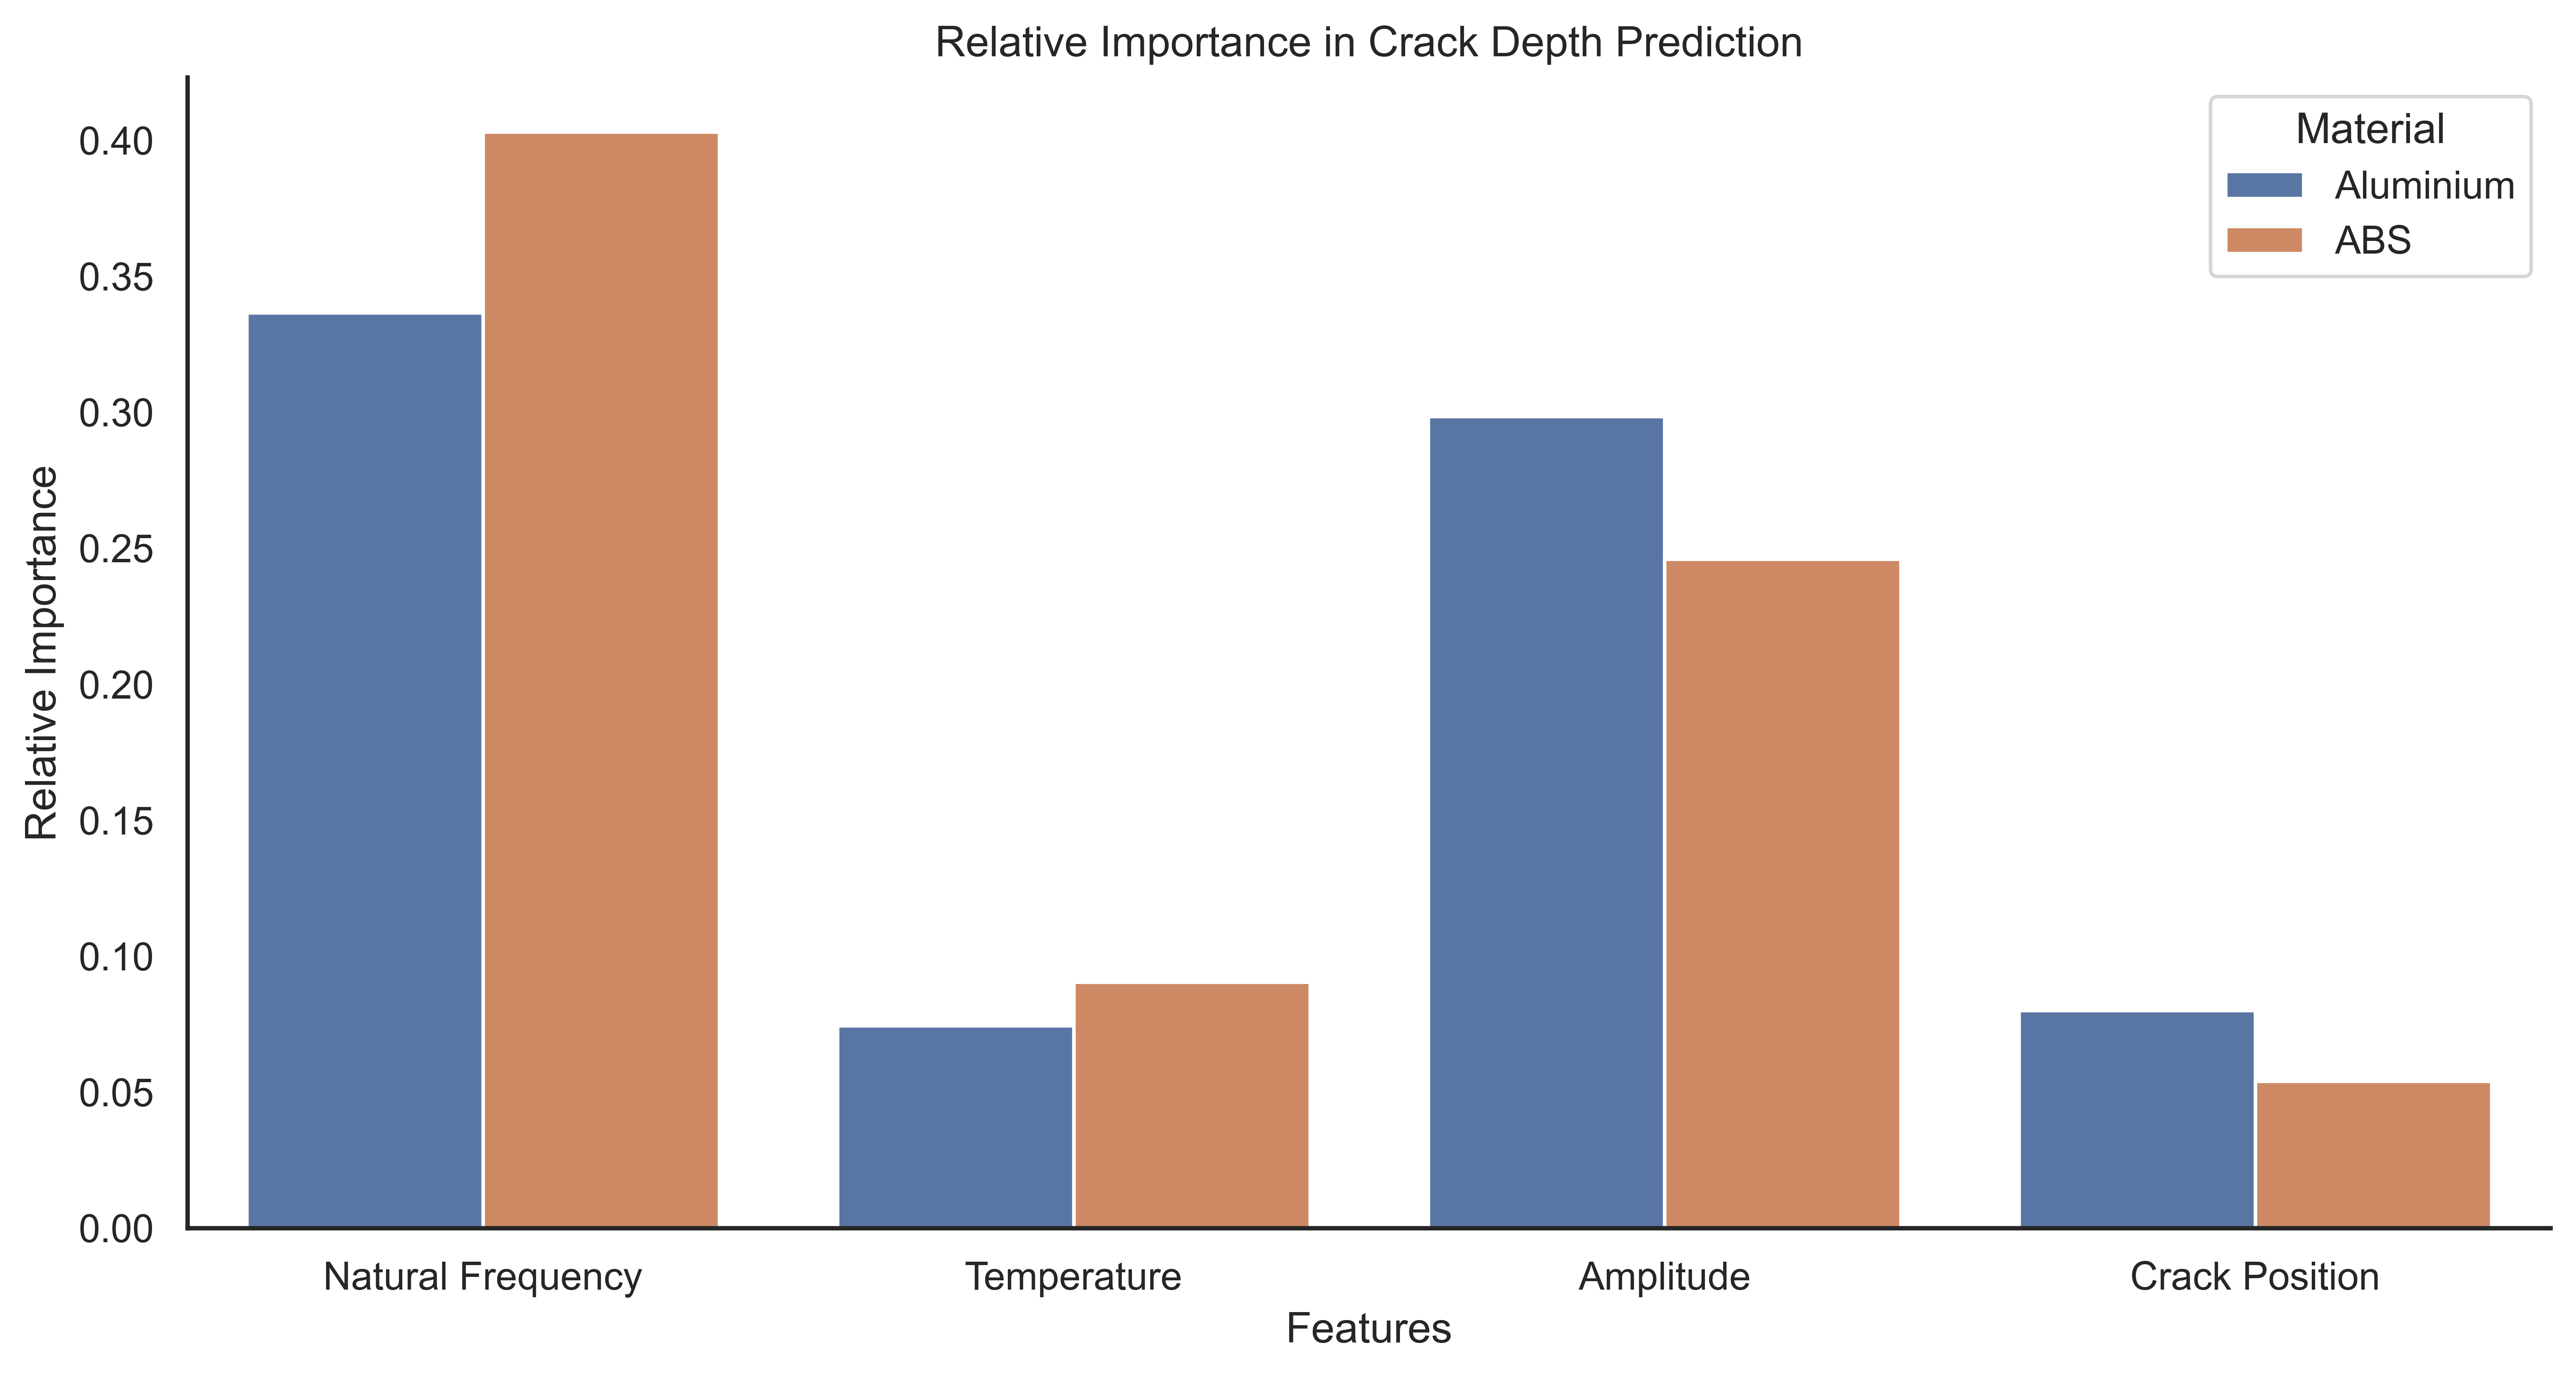

In [35]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300)
sns.barplot(x = 'features', y = 'coefficients', data = full_df, hue = 'Material', ax = ax, order = ['Natural Frequency', 'Temperature', 'Amplitude', 'Crack Position'])

sns.despine()

ax.set_title('Relative Importance in Crack Depth Prediction')
ax.set_ylabel('Relative Importance')
ax.set_xlabel('Features')

plt.savefig(FIGURES.joinpath("relative_importance_in_crack_depth_prediction.png"))

## Recreating some of the Original Plots for ABS

In [36]:
al_df = pd.read_csv(FINAL_DATA/'al_data_final.csv')
abs_df = pd.read_csv(FINAL_DATA/'abs_data_final.csv')

In [37]:
abs_df

,x,temp,nf_hz,amp_mm,tc_act
0,5,23,29.17,4.73,0.50
1,5,23,27.84,5.45,0.80
2,5,23,27.20,4.58,1.15
3,5,23,25.82,5.37,1.60
4,5,23,25.41,4.48,1.70
...,...,...,...,...,...
144,25,70,20.93,4.97,2.00
145,25,70,19.35,4.33,2.05
146,25,70,15.84,3.79,2.25
147,25,70,13.98,3.77,2.30


In [38]:
al_df

,x,temp,nf_hz,amp_mm,tc_act
0,5,22,40.970000,12.010000,0.00
1,5,22,38.460000,12.290000,0.50
2,5,22,38.360000,10.470000,0.51
3,5,22,38.380000,9.880000,0.52
4,5,22,37.480877,12.786667,0.75
...,...,...,...,...,...
175,25,200,32.472500,17.736250,1.50
176,25,200,30.274583,18.053958,1.75
177,25,200,28.076667,18.371667,2.00
178,25,200,25.878750,18.689375,2.25


In [39]:
# Combine the two for ease of analysis
abs_df['material'] = 'ABS'
al_df['material'] = 'Aluminium'


In [40]:
abs_df

,x,temp,nf_hz,amp_mm,tc_act,material
0,5,23,29.17,4.73,0.50,ABS
1,5,23,27.84,5.45,0.80,ABS
2,5,23,27.20,4.58,1.15,ABS
3,5,23,25.82,5.37,1.60,ABS
4,5,23,25.41,4.48,1.70,ABS
...,...,...,...,...,...,...
144,25,70,20.93,4.97,2.00,ABS
145,25,70,19.35,4.33,2.05,ABS
146,25,70,15.84,3.79,2.25,ABS
147,25,70,13.98,3.77,2.30,ABS


In [41]:
both_df = pd.concat([al_df, abs_df])

In [42]:
both_df['temp'].replace({23: 22}, inplace = True)

In [43]:
fig1 = alt.Chart(both_df).mark_circle(opacity = 0.5).encode(
    x = alt.X('nf_hz:Q', title = 'Natural Frequency (Hz)'),
    y = alt.Y('amp_mm:Q', title = 'Amplitude (mm)', scale = alt.Scale(domain=(0, 22))),
    color = alt.Color('material:N', title = 'Material'),
    size = alt.Size('temp:O', title = 'Temperature (Celsius)')
).properties(
    width = 800,
    height = 400,
    title = 'Dynamic Response by Material'
).configure_axis(labelFontSize = 14).configure_legend(labelFontSize = 14)

save(fig1, fp = str(FIGURES/'dynamic_response_by_material.png'), fmt = 'png', method = 'selenium', scale_factor = 6.0)

In [44]:
fig1

alt.Chart(...)

In [45]:
fig2 = alt.Chart(both_df).mark_circle(opacity = 0.5).encode(
    x = alt.X('tc_act:Q', title = 'Measured Crack Depth (mm)'),
    y = alt.Y('nf_hz:Q', title = 'Natural Frequency (Hz)'),
    color = alt.Color('material:N', title = 'Material'),
    size = alt.Size('temp:O', title = 'Temperature (C)')
).properties(
    width = 800,
    height = 400,
    title = "Frequency Response to Crack Depth"
).configure_axis(labelFontSize = 14).configure_legend(labelFontSize = 14)


save(fig2, fp = str(FIGURES/'frequency_response_to_crack_depth.png'), fmt = 'png', method = 'selenium', scale_factor = 6.0)

In [46]:
fig2

alt.Chart(...)

In [47]:
fig3 = alt.Chart(both_df).mark_circle(opacity = 0.5).encode(
    x = alt.X('tc_act:Q', title = 'Measured Crack Depth (mm)'),
    y = alt.Y('amp_mm:Q', title = 'Amplitude (mm)'),
    color = alt.Color('material:N', title = 'Material'),
    size = alt.Size('temp:O', title = 'Temperature (C)')
).properties(
    width = 800,
    height = 400,
    title = "Amplitude Response to Crack Depth"
).configure_axis(labelFontSize = 14).configure_legend(labelFontSize = 14)

save(fig3, fp = str(FIGURES/'amplitude_response_to_crack_depth.png'), fmt = 'png', method = 'selenium', scale_factor = 6.0)

In [48]:
fig3

alt.Chart(...)

### Raw Values of the Coefficients

In [49]:
scaled_al_reg.coef_

array([ 0.07991679, -0.07437967, -0.33658135, -0.2984013 ])

In [50]:
abs_reg.coef_

array([ 0.05395617, -0.09042711, -0.40307748, -0.24602132])

In [51]:
al_coef_dict = {'features': ['Crack Position', 'Temperature', 'Natural Frequency', 'Amplitude'], 'coefficients': [coef for coef in list(scaled_al_reg.coef_)]}

In [52]:
al_coef_dict

{'features': ['Crack Position',
  'Temperature',
  'Natural Frequency',
  'Amplitude'],
 'coefficients': [0.07991679499061041,
  -0.07437966878905107,
  -0.33658134579034715,
  -0.2984013024920239]}

In [53]:
al_coef_df = pd.DataFrame(al_coef_dict)
al_coef_df

,features,coefficients
0,Crack Position,0.079917
1,Temperature,-0.074380
2,Natural Frequency,-0.336581
3,Amplitude,-0.298401


In [54]:
abs_coef_dict = {'features': ['Crack Position', 'Temperature', 'Natural Frequency', 'Amplitude'], 'coefficients': [coef for coef in list(abs_reg.coef_)]}

In [55]:
abs_coef_df = pd.DataFrame(abs_coef_dict)
abs_coef_df

,features,coefficients
0,Crack Position,0.053956
1,Temperature,-0.090427
2,Natural Frequency,-0.403077
3,Amplitude,-0.246021


In [56]:
al_coef_df['Material'] = ['Aluminium', 'Aluminium', 'Aluminium', 'Aluminium']
abs_coef_df['Material'] = ['ABS', 'ABS', 'ABS', 'ABS']

In [57]:
all_coefs = pd.concat([al_coef_df, abs_coef_df], ignore_index = True)

In [58]:
all_coefs

,features,coefficients,Material
0,Crack Position,0.079917,Aluminium
1,Temperature,-0.074380,Aluminium
2,Natural Frequency,-0.336581,Aluminium
3,Amplitude,-0.298401,Aluminium
4,Crack Position,0.053956,ABS
5,Temperature,-0.090427,ABS
6,Natural Frequency,-0.403077,ABS
7,Amplitude,-0.246021,ABS


In [59]:
all_coefs['coefficients_rounded'] = np.round(all_coefs['coefficients'], 3)

In [60]:
all_coefs

,features,coefficients,Material,coefficients_rounded
0,Crack Position,0.079917,Aluminium,0.080
1,Temperature,-0.074380,Aluminium,-0.074
2,Natural Frequency,-0.336581,Aluminium,-0.337
3,Amplitude,-0.298401,Aluminium,-0.298
4,Crack Position,0.053956,ABS,0.054
5,Temperature,-0.090427,ABS,-0.090
6,Natural Frequency,-0.403077,ABS,-0.403
7,Amplitude,-0.246021,ABS,-0.246


In [61]:
alt.Chart(all_coefs).mark_bar().encode(
    x = alt.X('features:N', title = 'Feature'),
    y = alt.Y('coefficients:Q', title = 'Model Coefficient'),
    color = alt.Color('Material:N', title = 'Material'),
).properties(
    width = 800,
    height = 400,
    title = 'Model Coefficients'
)

alt.Chart(...)

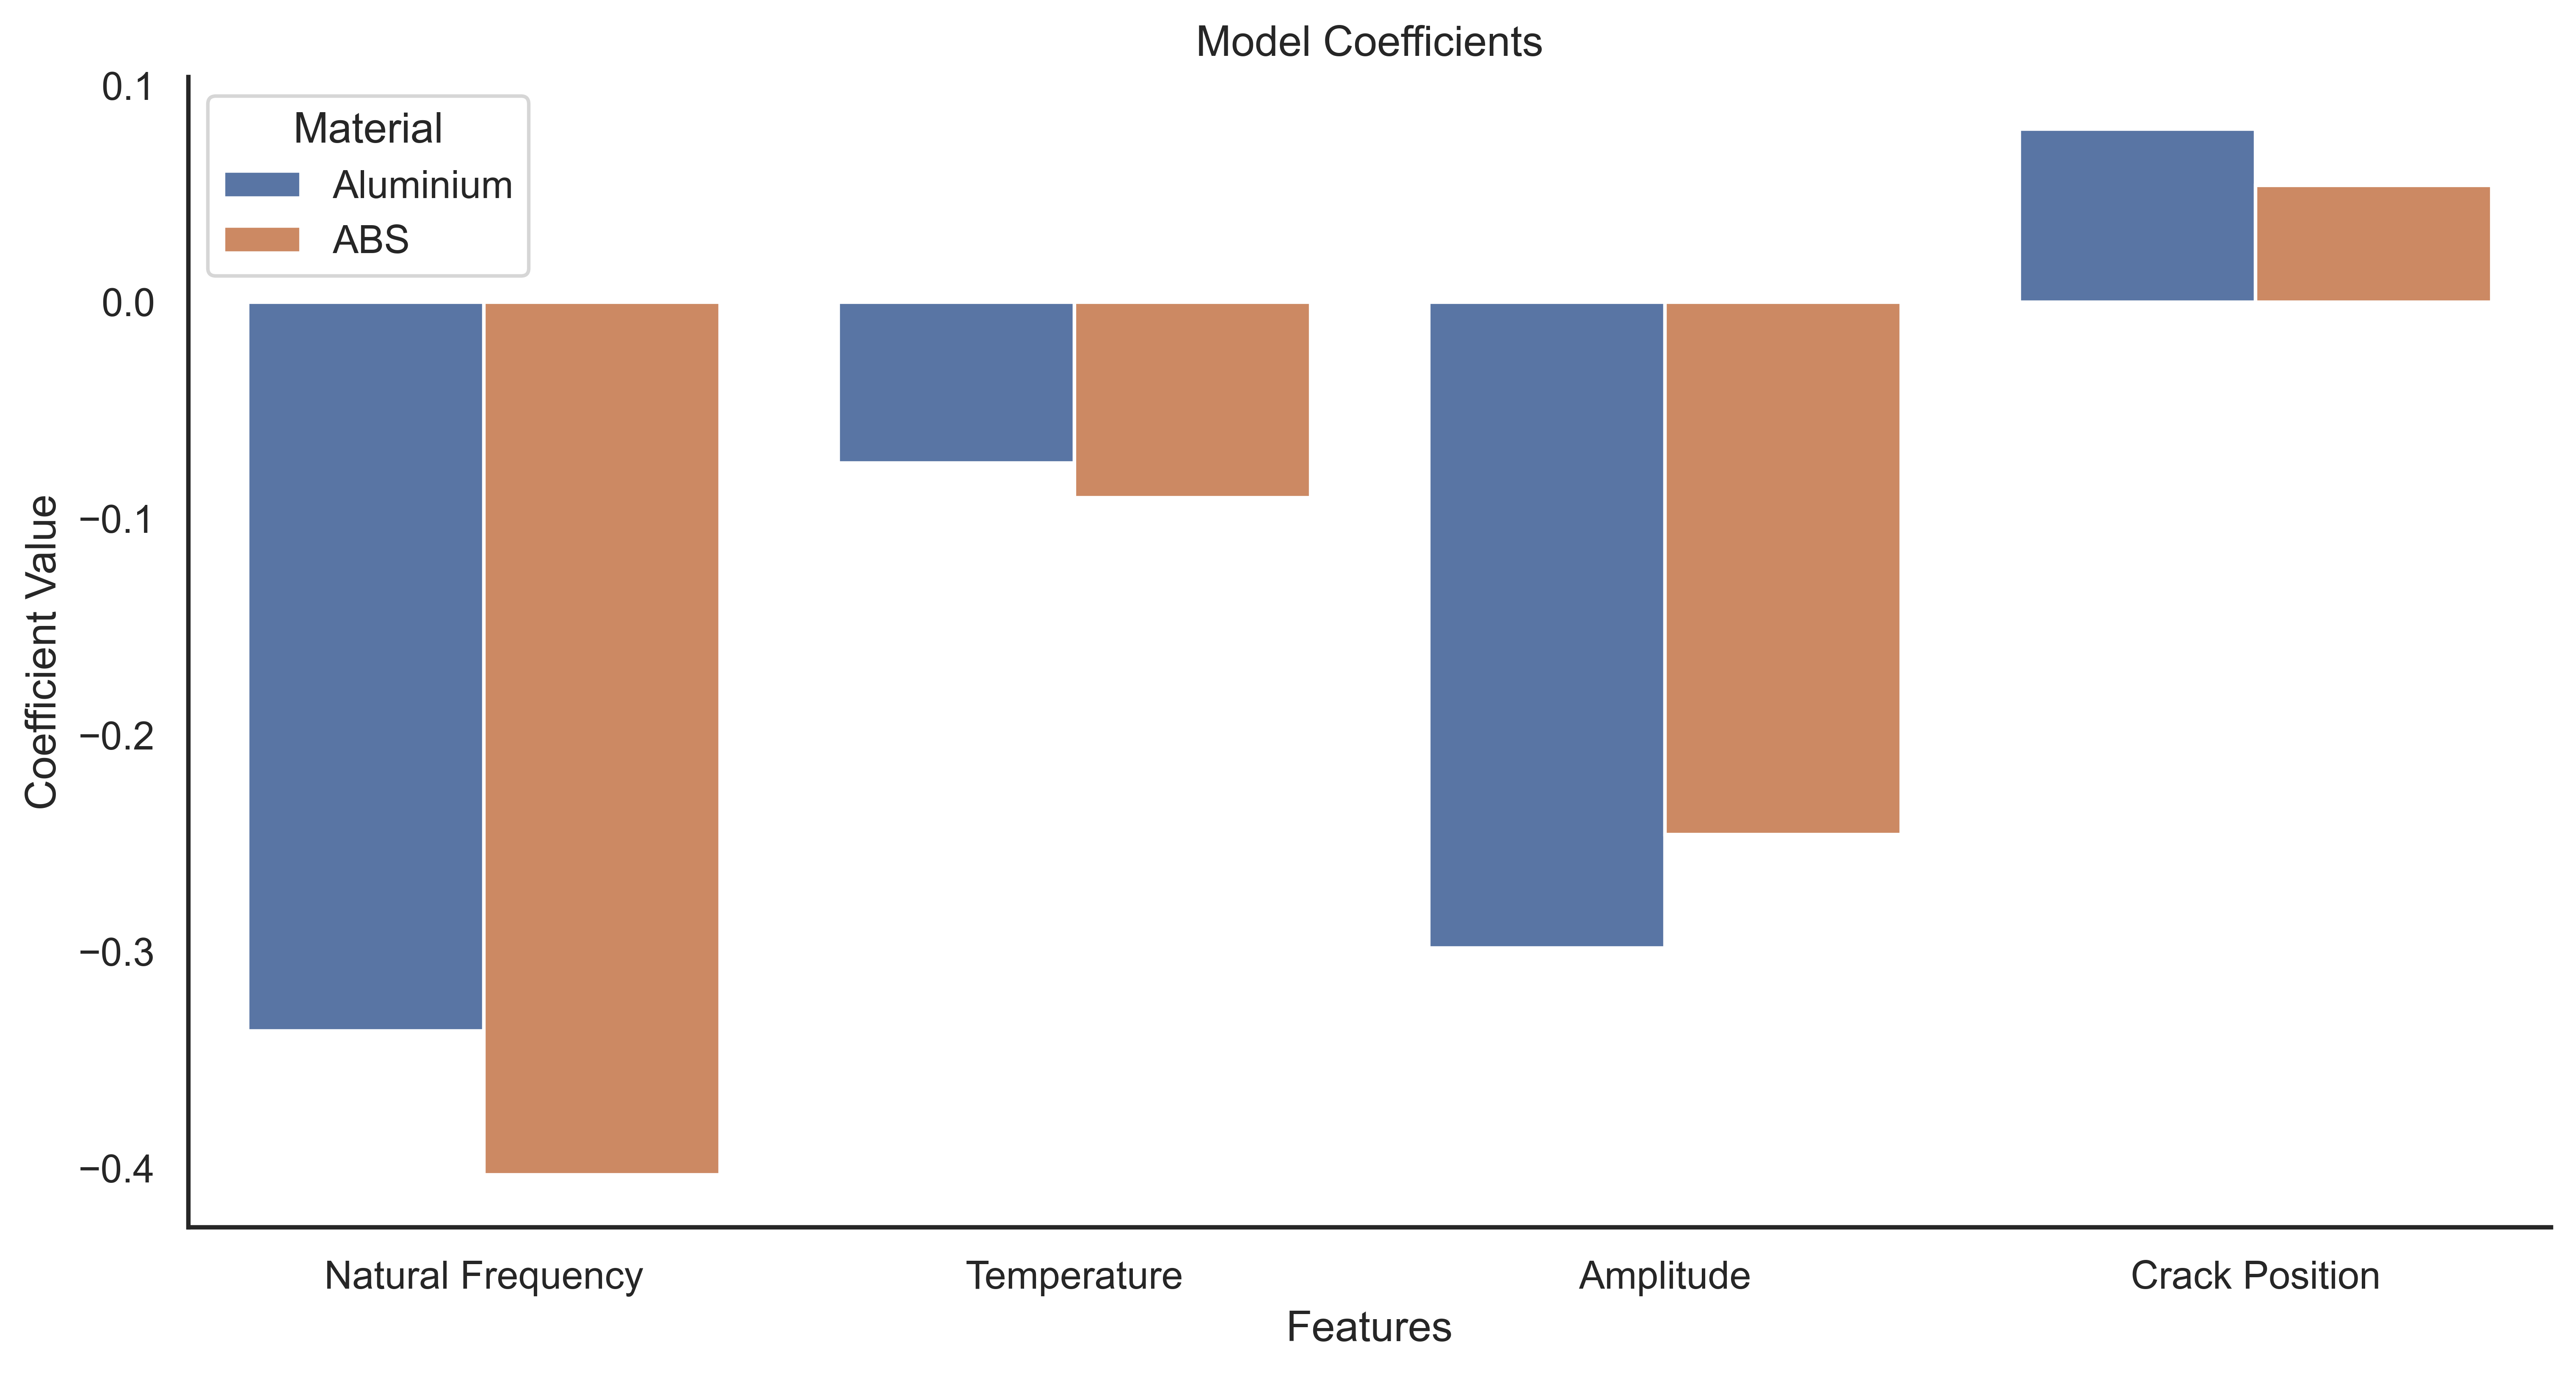

In [62]:
fig, ax = plt.subplots(figsize = (12, 6), dpi = 300)
sns.barplot(x = 'features', y = 'coefficients', data = all_coefs, hue = 'Material', ax = ax, order = ['Natural Frequency', 'Temperature', 'Amplitude', 'Crack Position'])



ax.set_title('Model Coefficients')
ax.set_ylabel('Coefficient Value')
ax.set_xlabel('Features')

sns.despine()

plt.savefig(FIGURES.joinpath("model_coefficients_seaborn.png"))